<p style="padding: 10px;
          color:#0000FF;
          background-color:powderblue;
          font-weight: bold;
          text-align: center;
          font-size:260%;"> 
TPS - OCT 2021 <br> EDA analysis </p>

In [ ]:
#import packages
import numpy as np
import pandas as pd 
import h2o
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train_pd = pd.read_csv('../input/tabular-playground-series-oct-2021/train.csv')
test_pd = pd.read_csv('../input/tabular-playground-series-oct-2021/test.csv')

In [ ]:
print("train data",train_pd.shape)
print("test data",test_pd.shape)

In [ ]:
print("Train data Info")
print(train_pd.info())
print("Test data Info")
print(test_pd.info())

In [ ]:
#check the columns of data
train_pd.columns

<p style="padding: 10px;
          color:#0000FF;
          background-color:powderblue;
          font-weight: bold;
          text-align: center;
          font-size:260%;"> 
EDA analysis </p>

In [ ]:
#checking Null values
train_pd.isna().sum().sum()
#there is no null values in dataset.

In [ ]:
fig = plt.subplots(figsize = (5,5))
sns.countplot(x='target',data=train_pd)

In [ ]:
#categorical values

cat_var=[]
for col in train_pd.columns:
    if train_pd[col].dtype=='int64': cat_var.append(col)
train=train_pd[0:5000]
test=test_pd[0:5000]

In [ ]:
# Boxplot of categorical variables

plt.figure(figsize=(30, 30))
sns.set(style="darkgrid")
i=1
for col in cat_var:
    plt.subplot(12,4,i)
    sns.countplot(data=train, x=col)
    i=i+1
plt.show()

In [ ]:
#histogram of numeric values.
num_col= [col for col in train_pd.columns if (col not in cat_var) ]
num_col1=num_col[:49]
plt.figure(figsize=(100, 100))
i=1
for col in num_col1:
    plt.subplot(10,5,i)
    sns.histplot(data=train, x=col)
    plt.title(col+" distribution")
    i=i+1
plt.show()

In [ ]:
corr = train.corr()
m = (corr.mask(np.eye(len(corr), dtype=bool)).abs() > 0.5).any()
cor = corr.loc[m, m]
cor

<p style="padding: 10px;
          color:#0000FF;
          background-color:powderblue;
          font-weight: bold;
          text-align: center;
          font-size:260%;"> 
AutoML  </p>

There are many open source AutoMl libraries, This notebook explain,how to use AutoML library.

<p style="padding: 10px;
          color:#0000FF;
          background-color:powderblue;
          font-weight: bold;
          text-align: center;
          font-size:260%;"> 
AutoML H2o.ai </p>

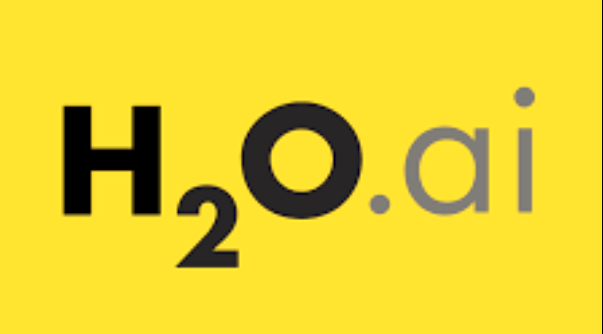

In [ ]:
import h2o
from h2o.automl import H2OAutoML

In [ ]:
h2o.init()

In [ ]:
#import train test files
train_h2o= h2o.H2OFrame(train)
test_h2o = h2o.H2OFrame(test)
h2o_submission = pd.read_csv('../input/tabular-playground-series-oct-2021/sample_submission.csv')

In [ ]:
x = train_h2o.columns
y = "target"
x.remove(y)
x.remove("id") #removing id  

In [ ]:
aml = H2OAutoML(max_runtime_secs=400, seed=1)
aml.train(x=x, y=y, training_frame=train_h2o)

In [ ]:
lb = aml.leaderboard
lb.head()  

In [ ]:
preds = aml.predict(test_h2o)
h2o_preds = h2o.as_list(preds)
h2o_preds

In [ ]:
h2o_submission[['target']] = h2o_preds[['predict']]
h2o_submission.head()

In [ ]:
### work in progress 
